In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
    # x_train : [50000, 32, 32, 3], y_train : [50000, 1], x_test : [10000, 32, 32, 3], y_test : [10000, 1]

class_num = 10

x_train = x_train.astype('float32') / 255.0 # normalization
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, class_num) # (one-hot encoding) convert to [50000, 10], [10000, 10]
y_test = to_categorical(y_test, class_num)

In [4]:
%%time
input_layer = layers.Input(shape=(32, 32, 3))

x = layers.Conv2D(32, 3, strides = 1, padding = 'same')(input_layer)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(32, 3, strides = 2, padding = 'same')(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(64, 3, strides = 1, padding = 'same')(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(64, 3, strides = 2, padding = 'same')(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Flatten()(x)

x = layers.Dense(128)(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Dropout(0.5)(x)

x = layers.Dense(class_num, activation='softmax')(x)

model = Model(input_layer, x)
model.summary()

opt = Adam(lr=0.0005)
model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_5 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
batch_normalization_6 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 16, 16, 32)        0   

In [5]:
%%time
model.fit(x_train, y_train, batch_size = 32, epochs = 15, shuffle = True)

Epoch 1/15
1563/1563 [==============================] - 40s 25ms/step - loss: 1.5219 - accuracy: 0.4660
Epoch 2/15
1563/1563 [==============================] - 40s 25ms/step - loss: 1.1227 - accuracy: 0.6027
Epoch 3/15
1563/1563 [==============================] - 40s 26ms/step - loss: 0.9891 - accuracy: 0.6529
Epoch 4/15
1563/1563 [==============================] - 40s 26ms/step - loss: 0.9125 - accuracy: 0.6815
Epoch 5/15
1563/1563 [==============================] - 40s 25ms/step - loss: 0.8519 - accuracy: 0.7024
Epoch 6/15
1563/1563 [==============================] - 40s 26ms/step - loss: 0.8060 - accuracy: 0.7183
Epoch 7/15
1563/1563 [==============================] - 40s 26ms/step - loss: 0.7603 - accuracy: 0.7357
Epoch 8/15
1563/1563 [==============================] - 40s 26ms/step - loss: 0.7265 - accuracy: 0.7463
Epoch 9/15
1563/1563 [==============================] - 40s 26ms/step - loss: 0.6848 - accuracy: 0.7607
Epoch 10/15
1563/1563 [==============================] - 40s 26m

In [6]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 8ms/step - loss: 0.8149 - accuracy: 0.7312


[0.8148646354675293, 0.7311999797821045]

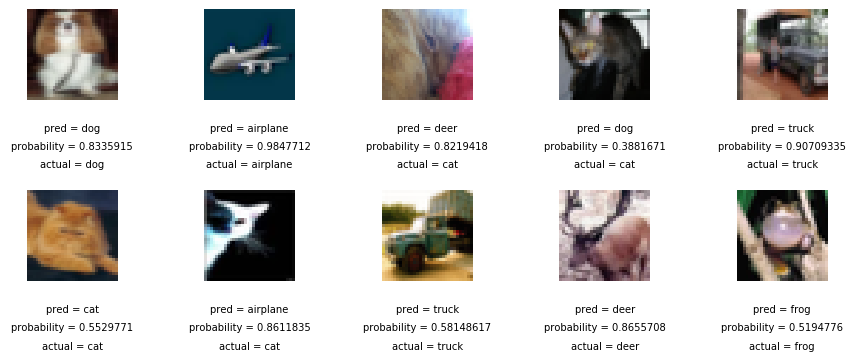

In [11]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test) # preds : [10000, 10]
preds_prob = np.max(preds, axis = -1)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
    # argmax를 사용해 하나의 예측 결과로 변환, axis = -1을 통해 마지막 차원으로 배열 압축, preds_single : [10000, 1]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

number_to_show = 10
indices = np.random.choice(range(len(x_test)), number_to_show)

fig = plt.figure(figsize = (15, 5))
fig.subplots_adjust(hspace = 1, wspace = 0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(2, number_to_show/2, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize = 10, ha = 'center', transform = ax.transAxes)
    ax.text(0.5, -0.55, 'probability = ' + str(preds_prob[idx]), fontsize = 10, ha = 'center', transform = ax.transAxes)
    ax.text(0.5, -0.75, 'actual = ' + str(actual_single[idx]), fontsize = 10, ha = 'center', transform = ax.transAxes)
    ax.imshow(img)

